In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

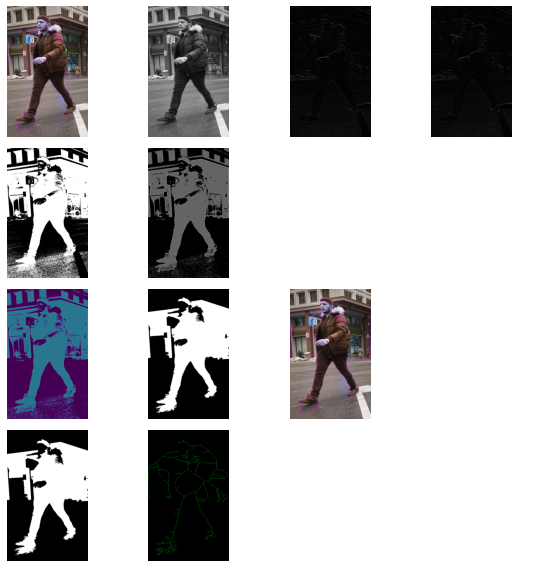

In [53]:
# Reading the image
image_list = [
    "business-man-1238376.jpg",  #        0
    "indian-people-1424719.jpg",  #       1
    "legos-people-group-1240136.jpg",  #  2
    "people-1241254.jpg",  #              3
    "people-1433035.jpg",  #              4
    "people-1498352.jpg",  #              5
    "people-5-1545709.jpg",  #            6
    "people-5-1546139.jpg",  #            7
    "people-listening-1239292.jpg",  #    8
    "cross_walk.jpg",  #                  9
    "cross_walk_she.png",  #              10
    "cross_walk_he.png",  #               11
]
image_nr = 11
image = "images/" + image_list[image_nr]


## Initial image and simple filters
image = cv2.imread(image, cv2.COLOR_RGB2BGR)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
mask_x = np.array([-1,1])
mask_y = mask_x.T
image_Ix = cv2.filter2D(image_gray, -1, mask_x)
image_Iy = cv2.filter2D(image_gray, -1, mask_y)


## Binary images
_, image_binary = cv2.threshold(image_gray, 99, 100, cv2.THRESH_BINARY_INV)
K_2 = np.ones((2,2), dtype='uint8')
image_binary_errode = cv2.erode(image_binary, K_2)


## Contours
contours, hierarchy= cv2.findContours(image_binary_errode, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
biggest_contour = sorted(contours, key=cv2.contourArea, reverse= True)[0]
image_contours = cv2.drawContours(image, [biggest_contour], -1, (255,0,255), 1)
image_binary_errode_contours = cv2.drawContours(image_binary_errode, [biggest_contour], -1, (255,0,255), 1)


## Binary mask and skeletonization
binary_mask = np.zeros(image.shape, dtype='uint8')   # black image
image_binary_mask_contours = cv2.drawContours(binary_mask, [biggest_contour], -1, (255,255,255), thickness=cv2.FILLED)
from skimage.morphology import skeletonize
mask_skeletonize = skeletonize(binary_mask == 255)


## Show results
f, axs = plt.subplots(4, 4, figsize=(8, 8))
axs[0,0].imshow(image)
axs[0,0].axis('off')
axs[0,1].imshow(image_gray, cmap='gray')
axs[0,1].axis('off')
axs[0,2].imshow(image_Ix, cmap='gray')
axs[0,2].axis('off')
axs[0,3].imshow(image_Iy, cmap='gray')
axs[0,3].axis('off')

axs[1,0].imshow(image_binary, cmap="gray")
axs[1,0].axis('off')
axs[1,1].imshow(image_binary_errode, cmap='gray')
axs[1,1].axis('off')
axs[1,2].axis('off')
axs[1,3].axis('off')

axs[2,0].imshow(image_binary_errode_contours)
axs[2,0].axis('off')
axs[2,1].imshow(image_binary_mask_contours)
axs[2,1].axis('off')
axs[2,2].imshow(image_contours)
axs[2,2].axis('off')
axs[2,3].axis('off')

axs[3,0].imshow(binary_mask)
axs[3,0].axis('off')
axs[3,1].imshow(mask_skeletonize)
axs[3,1].axis('off')
axs[3,2].axis('off')
axs[3,3].axis('off')

f.tight_layout()